## Goals
Our goal with this analysis is to determine if it makes sense to spend money on a player who has scored a lot of goals in hockey.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
%matplotlib inline
%run ./data-loading.ipynb

In [2]:
# Fetch the common set of player data everyone on the team is working with
player_data = fetch_player_data()

player_data.head()

Team Position  GP          TOI  Goals  Total Assists  \
Year Player                                                               
2015 Jamie Benn     DAL        F  82  1635.733333     35             52   
     John Tavares   NYI        F  82  1695.200000     38             48   
     Sidney Crosby  PIT        F  77  1538.533333     28             56   
     Alex Ovechkin  WSH        F  81  1646.400000     53             28   
     Jakub Voracek  PHI        F  82  1524.633333     22             59   

                    First Assists  Second Assists  Total Points  Shots    SH%  \
Year Player                                                                     
2015 Jamie Benn                32              20            87    253  13.83   
     John Tavares              30              18            86    278  13.67   
     Sidney Crosby             31              25            84    237  11.81   
     Alex Ovechkin             21               7            81    395  13.42   
     Jakub Voracek             31              28            81    221   9.95   

                    Shot Attempts  Hits  Hits Taken  
Year Player                                          
2015 Jamie Benn               466   120         101  
     John Tavares             471    48         103  
     Sidney Crosby            380    66         117  
     Alex Ovechkin            825   259         108  
     Jakub Voracek            424    55         139

First, lets look at the players who scored the most number of goals and the total number of games played.

In [3]:
# We want to find the players with most goals scored and the number of games played 

def get_sum_goals_and_games(x):
    d = {}
    d['Total_Goals_Scored'] = x['Goals'].sum()
    d['Total_Games_Played'] = x['GP'].sum()
    d['Total_Goals_Scored/Total_Games_Played'] = x['Goals'].sum()/x['GP'].sum()
    return pd.Series(d, index=['Total_Goals_Scored', 'Total_Games_Played', 'Total_Goals_Scored/Total_Games_Played'])

In [4]:
# Function to get the total games played over 5 years
def get_total_games_played(data):
    return data.groupby(['Year']).GP.agg('max').sum()

In [5]:
# This function returns the data with max gaols within the number of games
def get_top_goals_scorers(data, number):
    player_data_with_Most_Goals = data.groupby('Player').apply(get_sum_goals_and_games).sort_values(by='Total_Goals_Scored', ascending=False).head(number)
    return player_data_with_Most_Goals
   

In [6]:
# This function creates the bar graph for the data 
def plot_top_goals_scorers(data):
    data.plot(kind='bar',  stacked=True, figsize=(10, 7));

In [7]:
#Get top 10 goal scorers
top10 = get_top_goals_scorers(player_data,10)
top10

,Total_Goals_Scored,Total_Games_Played,Total_Goals_Scored/Total_Games_Played
Player,,,
Alex Ovechkin,236.0,405.0,0.582716
John Tavares,183.0,401.0,0.456359
Vladimir Tarasenko,182.0,395.0,0.460759
Nikita Kucherov,179.0,395.0,0.453165
Patrick Kane,178.0,388.0,0.458763
Sidney Crosby,172.0,393.0,0.437659
Brad Marchand,170.0,381.0,0.446194
Tyler Seguin,169.0,389.0,0.434447
Jamie Benn,165.0,401.0,0.411471


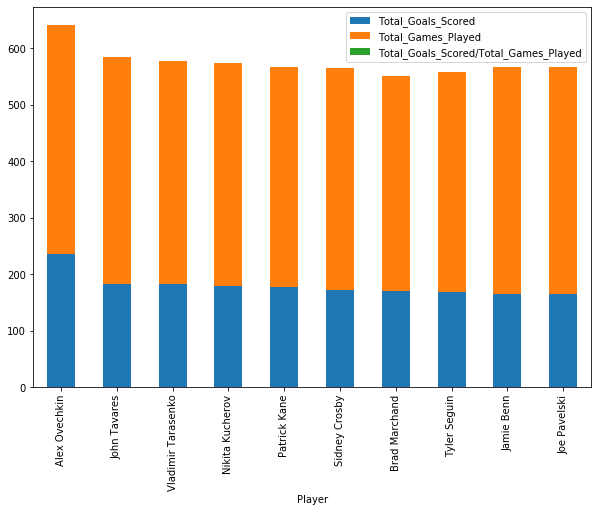

In [8]:
#Plot top 10 goal scorers
plot_top_goals_scorers(top10)

Above study shows that Alex Ovechkin scored the highest number of goals in all 5 years. 
He also played quite a significant number of games in these 5 years (405 out of 410). 
However, this alone does not determine that he should be chosen. We also have to look at the players who have been 
consistent over all 5 years. For that analysis we choose top 5 goal scorers.

In [9]:
#Get top 5 most goal scorers
top5 = get_top_goals_scorers(player_data,5)
top5

,Total_Goals_Scored,Total_Games_Played,Total_Goals_Scored/Total_Games_Played
Player,,,
Alex Ovechkin,236.0,405.0,0.582716
John Tavares,183.0,401.0,0.456359
Vladimir Tarasenko,182.0,395.0,0.460759
Nikita Kucherov,179.0,395.0,0.453165
Patrick Kane,178.0,388.0,0.458763


In [10]:
#Get data for top 5 most goal scorers
top5_data=player_data[player_data.index.get_level_values(1).isin(top5.index.get_level_values(0))]

top5_data

Team Position  GP          TOI  Goals  Total Assists  \
Year Player                                                                    
2015 John Tavares        NYI        F  82  1695.200000     38             48   
     Alex Ovechkin       WSH        F  81  1646.400000     53             28   
     Vladimir Tarasenko  STL        F  77  1356.566667     37             36   
     Nikita Kucherov     T.B        F  82  1225.983333     29             36   
     Patrick Kane        CHI        F  61  1211.666667     27             37   
2016 Patrick Kane        CHI        F  82  1672.883333     46             60   
     Vladimir Tarasenko  STL        F  80  1491.016667     40             34   
     Alex Ovechkin       WSH        F  79  1604.366667     50             21   
     John Tavares        NYI        F  78  1559.566667     33             37   
     Nikita Kucherov     T.B        F  77  1402.350000     30             36   
2017 Patrick Kane        CHI        F  82  1754.383333     34             55   
     Nikita Kucherov     T.B        F  74  1438.666667     40             45   
     Vladimir Tarasenko  STL        F  82  1514.533333     39             36   
     Alex Ovechkin       WSH        F  82  1506.016667     33             36   
     John Tavares        NYI        F  77  1572.250000     28             38   
2018 Nikita Kucherov     T.B        F  80  1585.716667     39             61   
     Alex Ovechkin       WSH        F  82  1651.833333     49             38   
     John Tavares        NYI        F  82  1633.866667     37             47   
     Patrick Kane        CHI        F  82  1655.300000     27             49   
     Vladimir Tarasenko  STL        F  80  1524.566667     33             33   
2019 Nikita Kucherov     T.B        F  82  1637.166667     41             87   
     Patrick Kane        CHI        F  81  1821.616667     44             66   
     Alex Ovechkin       WSH        F  81  1694.616667     51             38   
     John Tavares        TOR        F  82  1565.316667     47             41   
     Vladimir Tarasenko  STL        F  76  1397.283333     33             35   

                         First Assists  Second Assists  Total Points  Shots  \
Year Player                                                                   
2015 John Tavares                   30              18            86    278   
     Alex Ovechkin                  21               7            81    395   
     Vladimir Tarasenko             17              19            73    264   
     Nikita Kucherov                22              14            65    191   
     Patrick Kane                   25              12            64    186   
2016 Patrick Kane                   41              19           106    287   
     Vladimir Tarasenko             16              18            74    292   
     Alex Ovechkin                   6              15            71    398   
     John Tavares                   31               6            70    250   
     Nikita Kucherov                25              11            66    209   
2017 Patrick Kane                   36              19            89    292   
     Nikita Kucherov                28              17            85    246   
     Vladimir Tarasenko             18              18            75    286   
     Alex Ovechkin                  20              16            69    313   
     John Tavares                   21              17            66    260   
2018 Nikita Kucherov                33              28           100    279   
     Alex Ovechkin                  20              18            87    355   
     John Tavares                   28              19            84    258   
     Patrick Kane                   31              18            76    285   
     Vladimir Tarasenko             16              17            66    306   
2019 Nikita Kucherov                53              34           128    246   
     Patrick Kane                   40        

In [11]:
#Perpare crosstab in order to plot the graph for top 5 players
top5_data.reset_index(drop=False, inplace=True)
hockey_data_with_Most_Goals_Subset = pd.crosstab(index = top5_data['Year'], columns=top5_data["Player"], values=top5_data["Goals"],  aggfunc='sum')
hockey_data_with_Most_Goals_Subset

Player,Alex Ovechkin,John Tavares,Nikita Kucherov,Patrick Kane,Vladimir Tarasenko
Year,,,,,
2015,53,38,29,27,37
2016,50,33,30,46,40
2017,33,28,40,34,39
2018,49,37,39,27,33
2019,51,47,41,44,33


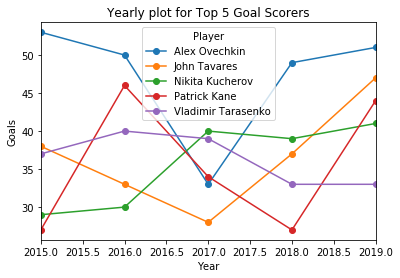

In [12]:
#Plot the graph for top 5 players
Top5Plot = hockey_data_with_Most_Goals_Subset.plot(style="-o",
                                    title="Yearly plot for Top 5 Goal Scorers")
Top5Plot.set_ylabel("Goals")
Top5Plot.set_xlabel("Year")
tmp = Top5Plot.plot()

In [13]:
#Function to get the Goals for the player
def get_player_goals(player_name):
    players_year_data = player_data[player_data.index.get_level_values(1) == player_name]
    return players_year_data['Goals']

In [14]:
#Function to get the parameters for the regression based on the dataframe passed
def get_line_params(player_yearly_goals):
    years = player_yearly_goals.index.get_level_values(0)
    goals = player_yearly_goals.values
    x = sm.add_constant(years)
    result = sm.OLS(goals, x).fit()
    intercept,slope = result.params
    return intercept,slope

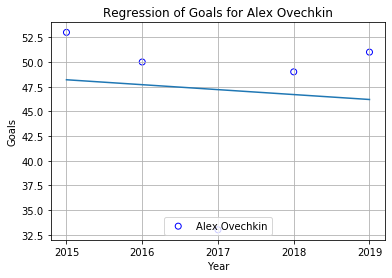

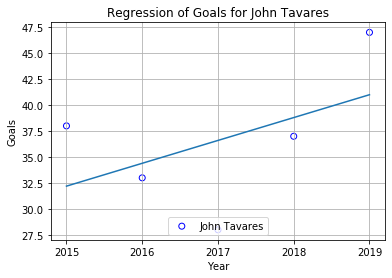

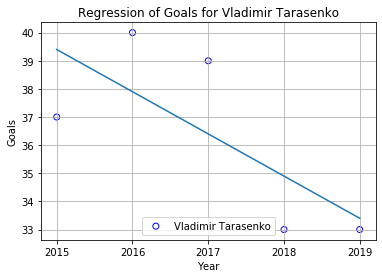

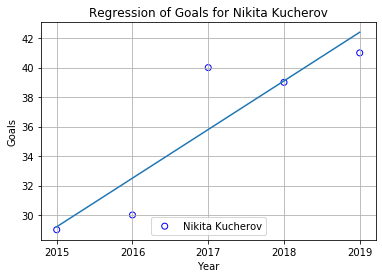

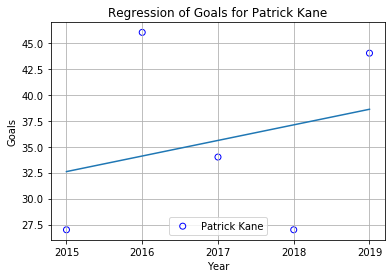

In [17]:
#Iterate through top 5 players in order to plot their graphs
for player in top5.index:
#    print(player)
    
    # for each assisters, get their secondary assists in every year
    player_yearly_goals = get_player_goals(player)
    # plot their line of best fit, and get the values we need
    intercept, slope = get_line_params(player_yearly_goals)

    #    print(intercept)
    #print(slope)
    
    years = player_yearly_goals.index.get_level_values(0)
#    print(years)
    plt.scatter( years, player_yearly_goals.values,
         marker='o', facecolors='none', edgecolors='b',
         label=player)

    plt.plot(  years, intercept + slope* years)
    plt.xlabel('Year') ; 
    plt.ylabel('Goals')
    plt.title('Regression of Goals for '+player) ;
    plt.xticks([2015,2016,2017,2018,2019])
    plt.grid() ;
    plt.legend(loc='lower center')
    plt.show()

Even though there are 3 top players with an upward trend in terms of scoring goals year after year.  

John Tavares (slope = 2.2), Patrick Kane (slope =1.5) and Nikita Kucherov (3.3)
    
Nikita Kucherov has the maximum slope and has been consistently improving over years.


**Conclusion**

If we just look at the top goal scorer over the five years then Alex Ovechkin should be chosen. However Nikita Kucherov 
has been consistently improving over years.